# Output and plotting

Once again, the output is loaded via `arviz`:

In [1]:
import arviz as az

iData = az.from_netcdf('./example_out_akm.nc')

Then, the output curves can be transformed to a `pandas.DataFrame` and stored as `.csv` file, to use them in other programs or plotting routines. We use the `thin` keyword-argument to keep only every 2nd sample, as the diagnostics in the previous example indicated some mild autocorrelation.

In [2]:
from pypsv.output import generate_curve_output

df = generate_curve_output(iData, thin=2, type='pandas')

df.to_csv('./output.csv', index=False)

The output can also be generated as numpy arrays. The samples will be collected in a dictionary, with keys `'D'`, `'I'` and `'F'`, depending on what data is included:

In [3]:
knots, curve_samples = generate_curve_output(iData, thin=2)

This output can be directly used for plotting, but we can also add the input data:

In [4]:
import numpy as np
from pandas import DataFrame

input_data = DataFrame(
    data={
        'F': [40, 45],
        'dF': [1.25, 0.7],
        'Age': [879., 1595.],
        'dAge': [20, np.nan],
        'Age type': ["14C SH", "absolute"],
    },
)

Text(0, 0.5, 'F [$\\mu$T]')

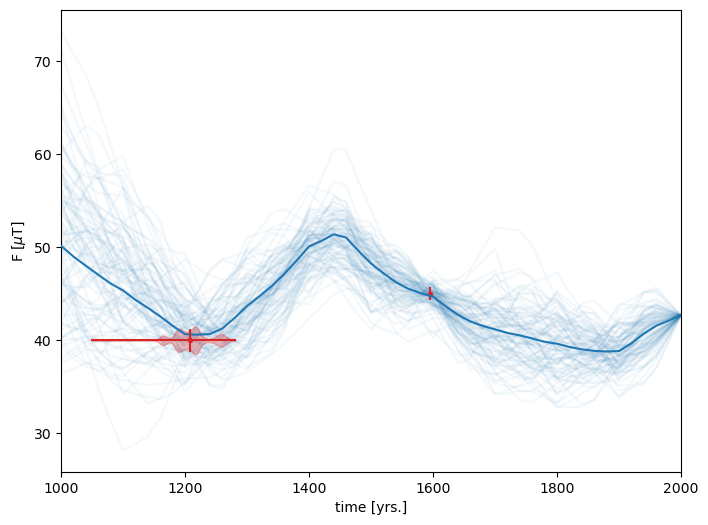

In [5]:
from matplotlib import pyplot as plt

from pypsv.plotting_helpers import add_input_data_to_ax

fig, ax = plt.subplots(
    1, 1,
    figsize=(8, 6),
)

ax.plot(
    knots,
    curve_samples['F'].mean(axis=1),
    color='C0',
    zorder=5,
)
ax.plot(
    knots,
    curve_samples['F'][:, ::10],
    color='C0',
    alpha=0.05,
    zorder=0,
)

add_input_data_to_ax(
    ax,
    input_data,
    'F',
    color='C3',
)
ax.set_xlim(min(knots), max(knots))
# ax.set_ylim(35, 60)
ax.set_xlabel('time [yrs.]')
ax.set_ylabel(r'F [$\mu$T]')

The predicted observations can be accessed as a dictionary:

In [6]:
from pypsv.output import generate_data_output

data = generate_data_output(iData, thin=2)

We can check if the time for a given sample is array like. If it is not, the sample was absolutely dated.

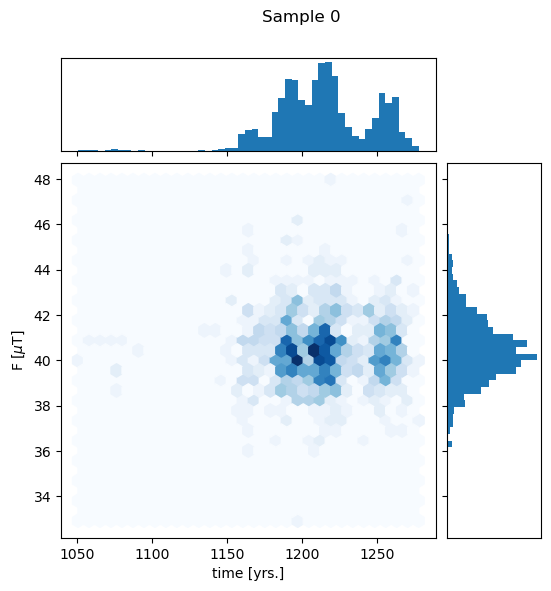

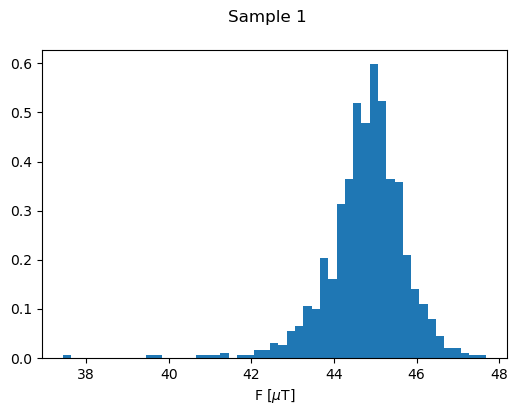

In [7]:
import numpy as np

for key in data.keys():
    this_data = data[key]
    if isinstance(this_data['t'], (list, tuple, np.ndarray)):
        fig = plt.figure(figsize=(6, 6))
        fig.suptitle(f'Sample {key}')

        gs = fig.add_gridspec(
            2, 2,
            width_ratios=(4, 1),
            height_ratios=(1, 4),
            left=0.1, right=0.9, bottom=0.1, top=0.9,
            wspace=0.05, hspace=0.05
        )

        ax = fig.add_subplot(gs[1, 0])

        ax.hexbin(
            this_data['t'],
            this_data['F'],
            gridsize=31,
            cmap='Blues',
        )

        ax.set_xlabel('time [yrs.]')
        ax.set_ylabel(r'F [$\mu$T]')

        ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)

        ax_histx.tick_params(axis="x", labelbottom=False)
        ax_histx.set_yticks([])

        ax_histx.hist(
            this_data['t'],
            bins=51,
            density=True,
        )

        ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
        ax_histy.tick_params(axis="y", labelleft=False)
        ax_histy.set_xticks([])

        ax_histy.hist(
            this_data['F'],
            bins=51,
            density=True,
            orientation='horizontal',
        )
    else:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))

        fig.suptitle(f'Sample {key}')
        ax.hist(
            this_data['F'],
            bins=51,
            density=True,
        )
        ax.set_xlabel(r'F [$\mu$T]')